# MSdata Task

**Preprocessing:**

* Scaling
    * Mean centering and dividing by standard deviation
    * Minmaxscaling to [0,1]
* PCA
    * 550 components

**Distances and affinities:**

* Euclidean >< 1/(1+euclidean)
* Cosine distance/similarity

**Methods:**

* K-means
* Spectral clustering
* DBSCAN (irrelevant)
* Agglomerative clustering

**Results:**
* Best result: Spectral clustering with 1/(1+euclidean distance) as affinity, Minmaxscaling
    Clusters = 5
    NMI = 0.8977 
 
* Second best result: Spectral clustering with 550 PCA-components, 1/(1+euclidean distance) as affinity, Standardscaling
    Clusters = 7
    NMI = 0.8949

* Third best:  Spectral clustering with 1/(1+euclidean distance) as affinity, no preprocessing
    Clusters = 6
    NMI = 0.8847

## Setup

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Clustering methods
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

#Distance metrics
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import DistanceMetric #For mahalanobis

#Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import SpectralEmbedding

# Metrics
from sklearn.metrics.cluster import normalized_mutual_info_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [3]:
df = pd.read_csv("./data/msdata.csv", header = 0)
df

,id,class,f1,f2,f3,f4,f5,f6,f7,f8,...,f4991,f4992,f4993,f4994,f4995,f4996,f4997,f4998,f4999,f5000
0,1,1,14.7476,15.3005,17.4703,14.8223,17.0740,14.7568,10.6366,11.3165,...,17.8866,6.8360,12.7977,15.6400,16.1506,17.1062,14.7575,13.4128,14.1470,18.4883
1,2,1,16.1612,15.6718,17.6609,17.6090,17.4288,15.4954,9.5740,14.8143,...,17.7767,15.2447,13.9961,15.9585,16.4648,17.4712,15.0304,14.1189,14.8040,19.4082
2,3,1,16.3225,15.4946,17.3564,14.8182,17.7625,14.4539,11.1484,13.8300,...,17.6984,11.6416,12.8275,14.9895,16.4143,17.6745,14.7615,12.9050,14.7798,18.9794
3,4,1,15.4337,14.6519,17.4111,16.6048,17.2341,15.0404,11.4655,10.3837,...,17.7769,15.0042,13.2926,16.0378,16.1182,16.7441,14.8373,13.3637,13.9702,18.1746
4,5,1,16.0579,15.1974,17.4781,16.7797,17.6097,15.4278,8.7012,13.9750,...,17.6669,15.1619,13.6530,15.3895,16.2457,17.4527,14.9707,12.5546,14.8331,19.0512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,690,3,11.0183,8.9493,17.5035,15.0010,17.5672,14.4627,8.2306,14.3206,...,9.9268,15.2167,13.5536,15.7954,9.8979,17.8046,18.2610,7.8796,6.9577,13.7735
690,691,3,8.9789,15.5676,17.6476,17.3428,10.6311,14.4161,16.4037,14.5159,...,17.8073,14.7698,14.6110,16.0002,16.1689,17.4165,18.3884,8.8354,10.4884,19.0953
691,692,3,16.1161,15.4710,9.8349,18.5084,8.6035,7.5401,14.2796,13.7709,...,17.6998,16.0514,9.4812,10.6424,16.0951,8.7562,18.6430,13.3147,13.6202,18.1803
692,693,3,16.0459,15.2779,17.5605,17.4232,16.8446,14.3926,17.6199,14.3125,...,17.8582,15.2462,14.0752,15.8942,15.9932,17.3534,18.6915,13.2952,14.7476,18.4206


In [6]:
labels_true = df["class"].to_numpy()
data = df.iloc[:, 2:].to_numpy()
data = data.astype(np.float)

In [7]:
# Scoring helper to ensure geometric averaging method is always used
def score(labels_true, labels_predicted):
    return normalized_mutual_info_score(labels_true, labels_predicted, average_method="geometric")

## Preprocessing

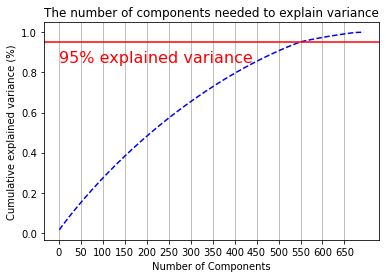

66.26356027589608
1.0000000000000073


In [156]:
# Scaling: mean center and divide by standard deviation
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Scaling: Each feature scaled to [0,1]
scaler = MinMaxScaler()
data_minmax = scaler.fit_transform(data)

#Finding out how many PCA components we might want to have
pca = PCA().fit(data_minmax)
x = np.arange(1, 695, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
fig, ax = plt.subplots()
plt.plot(x, y, marker='', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 695, step=50))
plt.ylabel('Cumulative explained variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% explained variance', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

#PCA
data_pca = pd.DataFrame(PCA(n_components=550).fit_transform(data_std))
#PCA produces negatives so shifting by min value
data_pca_pos = data_pca - data_pca.to_numpy().min()
print(data_pca_pos.to_numpy().max())

#Spectral embedding
data_spec_emb = SpectralEmbedding(n_components = 550).fit_transform(data_std)
data_spec_emb.shape

#Affinity (><distance) matrices
aff_euc = 1/(1+euclidean_distances(data))
aff_cos = cosine_similarity(data)

aff_std_euc = 1/(1+euclidean_distances(data_std))
aff_std_cos = cosine_similarity(data_std)


aff_minmax_euc = 1/(1+euclidean_distances(data_minmax))
aff_minmax_cos = cosine_similarity(data_minmax)
print(aff_minmax_cos.max())

#PCA Affinity (><distance) matrices
aff_pca_euc = 1/(1+euclidean_distances(data_pca))
aff_pca_cos = cosine_similarity(data_pca)

## K-means

### No preprocessing

In [53]:

labels_km = []
scores_km = []

for i in range(2, 10):
    print(i)
    km = KMeans(n_clusters=int(i), algorithm="full").fit(data)
    labels = km.predict(data)
    labels_km.append(labels)
    scores_km.append(score(labels_true, labels))

print()
for i, s in enumerate(scores_km):
    print("K = {}: {}".format(i+2, round(s, 4)))

2
3
4
5
6
7
8
9

K = 2: 0.3377
K = 3: 0.0038
K = 4: 0.1002
K = 5: 0.0422
K = 6: 0.0641
K = 7: 0.0975
K = 8: 0.1036
K = 9: 0.0852


### W/ Standardscaling

In [54]:
labels_km_std = []
scores_km_std = []

for i in range(2, 10):
    print(i)
    km = KMeans(n_clusters=int(i), algorithm="full").fit(data_std)
    labels = km.predict(data_std)
    labels_km_std.append(labels)
    scores_km_std.append(score(labels_true, labels))

print()
for i, s in enumerate(scores_km_std):
    print("K = {}: {}".format(i+2, round(s, 4)))

2
3
4
5
6
7
8
9

K = 2: 0.348
K = 3: 0.0731
K = 4: 0.0064
K = 5: 0.1751
K = 6: 0.1571
K = 7: 0.1129
K = 8: 0.1427
K = 9: 0.0848


### W/ Minmaxscaling

In [55]:
labels_km_minmax = []
scores_km_minmax = []

for i in range(2, 10):
    print(i)
    km = KMeans(n_clusters=int(i), algorithm="full").fit(data_minmax)
    labels = km.predict(data_minmax)
    labels_km_minmax.append(labels)
    scores_km_minmax.append(score(labels_true, labels))

print()

for i, s in enumerate(scores_km_minmax):
    print("K = {}: {}".format(i+2, round(s, 4)))

2
3
4
5
6
7
8
9

K = 2: 0.3628
K = 3: 0.0038
K = 4: 0.0064
K = 5: 0.0987
K = 6: 0.0836
K = 7: 0.0684
K = 8: 0.0775
K = 9: 0.1294


## Spectral clustering

### No preprocessing

In [58]:
labels_spec = []
scores_spec = []

####Different distance metrics####
aff = aff_euc 
#aff = aff_cos

for i in range(2, 10):
    print(i)
    spec = SpectralClustering(n_clusters=int(i),random_state=0,affinity="precomputed").fit(aff)
    labels = spec.labels_
    labels_spec.append(labels)
    scores_spec.append(score(labels_true, labels))

print()
for i, s in enumerate(scores_spec):
    print("Clusters = {}: {}".format(i+2, round(s, 4)))

2
3
4
5
6
7
8
9

Clusters = 2: 0.537
Clusters = 3: 0.5823
Clusters = 4: 0.5702
Clusters = 5: 0.5782
Clusters = 6: 0.8847
Clusters = 7: 0.8477
Clusters = 8: 0.6956
Clusters = 9: 0.5979


### W/ Standardscaling

In [151]:
labels_spec_std = []
scores_spec_std = []

####Different distance metrics####
#aff = aff_std_euc
#aff = aff_std_cos #produces "ValueError: array must not contain infs or"
#with PCA
aff = aff_pca_euc
#aff = aff_pca_cos #produces "ValueError: array must not contain infs or"


for i in range(2, 10):
    print(i)
    spec = SpectralClustering(n_clusters=int(i),random_state=0,affinity="precomputed").fit(aff)
    labels = spec.labels_
    labels_spec_std.append(labels)
    scores_spec_std.append(score(labels_true, labels))

print()
for i, s in enumerate(scores_spec_std):
    print("Clusters = {}: {}".format(i+2, round(s, 4)))

2


/opt/conda/lib/python3.8/site-packages/scipy/sparse/csgraph/_laplacian.py:120: RuntimeWarning: invalid value encountered in sqrt
  w = np.where(isolated_node_mask, 1, np.sqrt(w))


ValueError: array must not contain infs or NaNs

### W/ Minmaxscaling

In [162]:
labels_spec_minmax = []
scores_spec_minmax = []

####Different distance metrics####
aff = aff_minmax_euc
#aff = aff_minmax_cos

for i in range(2, 10):
    print(i)
    spec = SpectralClustering(n_clusters=int(i),affinity="precomputed").fit(aff)
    labels = spec.labels_
    labels_spec_minmax.append(labels)
    scores_spec_minmax.append(score(labels_true, labels))

print()
for i, s in enumerate(scores_spec_minmax):
    print("Clusters = {}: {}".format(i+2, round(s, 4)))

2
3
4
5
6
7
8
9

Clusters = 2: 0.0003
Clusters = 3: 0.5736
Clusters = 4: 0.5731
Clusters = 5: 0.8977
Clusters = 6: 0.8835
Clusters = 7: 0.6832
Clusters = 8: 0.6756
Clusters = 9: 0.585


## DBSCAN

### \W euclidean and PCA

In [142]:
####Different distance metrics#### NO AFFINITY HERE
dist = euclidean_distances(data_pca)

#Trying fifferent epsilons RANGE DEPENDS ON THE DISTANCE METRIC
for epsilon in  range(1,int(round(dist.max()+1))):
    db = DBSCAN(eps = epsilon, metric = 'precomputed').fit(dist)
    labels = db.labels_
    print("Epsilon = {}: Clusters = {}: NMI = {}".format(epsilon,(len(set(labels)) - (1 if -1 in labels else 0)),score(labels_true, labels)))

#eps = ~30 was the best for euclidean pca
db = DBSCAN(eps = 30, metric = 'precomputed').fit(dist)
labels = db.labels_
print(labels)

Epsilon = 1: Clusters = 0: NMI = 0.25
Epsilon = 2: Clusters = 0: NMI = 0.25
Epsilon = 3: Clusters = 0: NMI = 0.25
Epsilon = 4: Clusters = 0: NMI = 0.25
Epsilon = 5: Clusters = 0: NMI = 0.25
Epsilon = 6: Clusters = 0: NMI = 0.25
Epsilon = 7: Clusters = 0: NMI = 0.25
Epsilon = 8: Clusters = 1: NMI = 0.030908883558194433
Epsilon = 9: Clusters = 1: NMI = 0.030908883558194433
Epsilon = 10: Clusters = 1: NMI = 0.03388260912175346
Epsilon = 11: Clusters = 1: NMI = 0.03388260912175346
Epsilon = 12: Clusters = 1: NMI = 0.02058500123533564
Epsilon = 13: Clusters = 1: NMI = 0.014678171866716085
Epsilon = 14: Clusters = 1: NMI = 0.014560465529044447
Epsilon = 15: Clusters = 1: NMI = 0.015360969450547766
Epsilon = 16: Clusters = 1: NMI = 6.182465666958658e-05
Epsilon = 17: Clusters = 1: NMI = 6.182465666958658e-05
Epsilon = 18: Clusters = 1: NMI = 6.182465666958658e-05
Epsilon = 19: Clusters = 1: NMI = 0.0002851828772007909
Epsilon = 20: Clusters = 1: NMI = 0.0002851828772007909
Epsilon = 21: Clust

### W/ cosine distance and PCA

In [148]:
#Trying different epsilons RANGE DEPENDS ON THE DISTANCE METRIC
for epsilon in  np.linspace(0.0001,1,100):
    db = DBSCAN(eps = epsilon, metric = 'cosine').fit(data_pca)
    labels = db.labels_
    print("Epsilon = {}: Clusters = {}: NMI = {}".format(epsilon,(len(set(labels)) - (1 if -1 in labels else 0)),score(labels_true, labels)))

#eps = ~0.8485 was the best for cosine pca
db = DBSCAN(eps = 0.8485, metric = 'cosine').fit(data_minmax)
labels = db.labels_
print(labels)

Epsilon = 0.0001: Clusters = 0: NMI = 0.25
Epsilon = 0.010199999999999999: Clusters = 1: NMI = 0.027745799379661838
Epsilon = 0.0203: Clusters = 1: NMI = 0.03388260912175346
Epsilon = 0.0304: Clusters = 1: NMI = 0.03670613237279806
Epsilon = 0.0405: Clusters = 1: NMI = 0.0061649763044287756
Epsilon = 0.0506: Clusters = 1: NMI = 0.00043070730166244053
Epsilon = 0.060700000000000004: Clusters = 1: NMI = 6.182465666958658e-05
Epsilon = 0.0708: Clusters = 1: NMI = 6.182465666958658e-05
Epsilon = 0.0809: Clusters = 1: NMI = 0.0002851828772007909
Epsilon = 0.091: Clusters = 1: NMI = 0.0002851828772007909
Epsilon = 0.1011: Clusters = 1: NMI = 0.0002851828772007909
Epsilon = 0.1112: Clusters = 1: NMI = 0.0002851828772007909
Epsilon = 0.1213: Clusters = 1: NMI = 0.0002851828772007909
Epsilon = 0.1314: Clusters = 1: NMI = 0.0002851828772007909
Epsilon = 0.1415: Clusters = 1: NMI = 0.0002851828772007909
Epsilon = 0.15159999999999998: Clusters = 1: NMI = 0.0002851828772007909
Epsilon = 0.161699999

2
3
4
5
6
7
8
9

Clusters = 2: 0.0003
Clusters = 3: 0.5736
Clusters = 4: 0.5731
Clusters = 5: 0.8977
Clusters = 6: 0.8835
Clusters = 7: 0.6832
Clusters = 8: 0.6756
Clusters = 9: 0.585
